In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15,8)})

path_to_catalog=r'C:\Users\kgrzebien\Desktop\python_tasks\reklamacje\\'


In [2]:
def func_read_excel(path, sheet):
    df=pd.read_excel(path_to_catalog+path+'.xlsx',
                    sheet_name=sheet)
    display(df.columns)
    # for i in df.columns:
    #     display(i,df[i].unique())
    display(df.groupby('PRZYCZYNA REKLAMACJI').agg({'IMIĘ I NAZWISKO':'count'}).sort_values(by='IMIĘ I NAZWISKO'))
    display(df.groupby('PRODUKT').agg({'IMIĘ I NAZWISKO':'count'}).sort_values(by='IMIĘ I NAZWISKO'))
    df['produkt_2']=df.loc[df['PRODUKT'].notnull()]['PRODUKT'].apply(lambda x: 'ZASŁONY' if 'ZAS' in x else ('FIRANY' if "FIR" in x else x))
    display(df.groupby('produkt_2').agg({'IMIĘ I NAZWISKO':'count'}).sort_values(by='IMIĘ I NAZWISKO').tail(50))
    return df

In [3]:
df=func_read_excel('REKLAMACJE INTERNETU od 2017',
               '2022R.')

Index(['Unnamed: 0', 'Eurofirany/ ALLEGRO', 'IMIĘ I NAZWISKO',
       'PRZYCZYNA REKLAMACJI', 'PRODUKT', 'ZWROT GOTÓWKI', 'ROZWIĄZANIE',
       'KLIENT POINFORMOWANY', 'WYSŁANO', 'DATA I NR. KOREKTY', 'UWAGI',
       'DATA PRZYJĘCIA', 'OS. PRZYJMUJĄCA REKLAMACJĘ', 'NUMER ZLECENIA',
       'E-MAIL', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

,IMIĘ I NAZWISKO
PRZYCZYNA REKLAMACJI,
2300000018707.0,1
USZKODZONY ZEGAR,1
USZKODZONY ŚWIECZNIK OD NAKLEJKI,1
USZODZONE PRZY PRZELOTKACH,1
USZYTE Z ZŁEGO MATERIAŁU,1
...,...
NAPRAWA/SZWALNIA,10
INNY KOLOR NIŻ NA STRONIE,11
ZŁY WYMIAR,12


,IMIĘ I NAZWISKO
PRODUKT,
,1
RĘCZNIKI,1
SKR.INT,1
SKRZYNKA,1
SZYTA ZASŁONA,1
...,...
FIRANA,29
FIRANY,30
POŚCIEL,33


,IMIĘ I NAZWISKO
produkt_2,
BOMBKI,1
C/ALANI/1/MIS/01,1
LU/10,1
CHON/SOFIA/1/KAW,1
LC/VICTORIA,1
C/MESI/TAC/02,1
C/SESI/TAC/02,1
CAŁE ZAM,1
CAŁE ZAMÓWIENIA,1


In [17]:
import unidecode
df['PRODUKT']=df['PRODUKT'].apply(lambda x: unidecode.unidecode(x) if type(x)!=type(np.nan) else x)
df['PRODUKT']=df['PRODUKT'].apply(lambda x: x.lower() if type(x)!=type(np.nan) else x)

df['PRZYCZYNA REKLAMACJI']=df['PRZYCZYNA REKLAMACJI'].apply(lambda x: str(x) if type(x)!=type(np.nan) else x)
df['PRZYCZYNA REKLAMACJI']=df['PRZYCZYNA REKLAMACJI'].apply(lambda x: unidecode.unidecode(x) if type(x)!=type(np.nan) else x)
df['PRZYCZYNA REKLAMACJI']=df['PRZYCZYNA REKLAMACJI'].apply(lambda x: x.lower() if type(x)!=type(np.nan) else x)

In [7]:
df[['PRZYCZYNA REKLAMACJI']].drop_duplicates()

,PRZYCZYNA REKLAMACJI
0,zwrot
3,naprawa/ zwrot???
9,naprawa/szwalnia
11,wymiana
25,zwrot/wymiana
...,...
531,kolor / dziurka
532,zle zszyta
533,nie pasuje material
536,odcien


In [21]:
df['PRZYCZYNA REKLAMACJI']=df['PRZYCZYNA REKLAMACJI'].astype(str)

In [127]:
lev_similarity_1=[np.max(np.delete(i, np.where(i==0))) for i in lev_similarity]

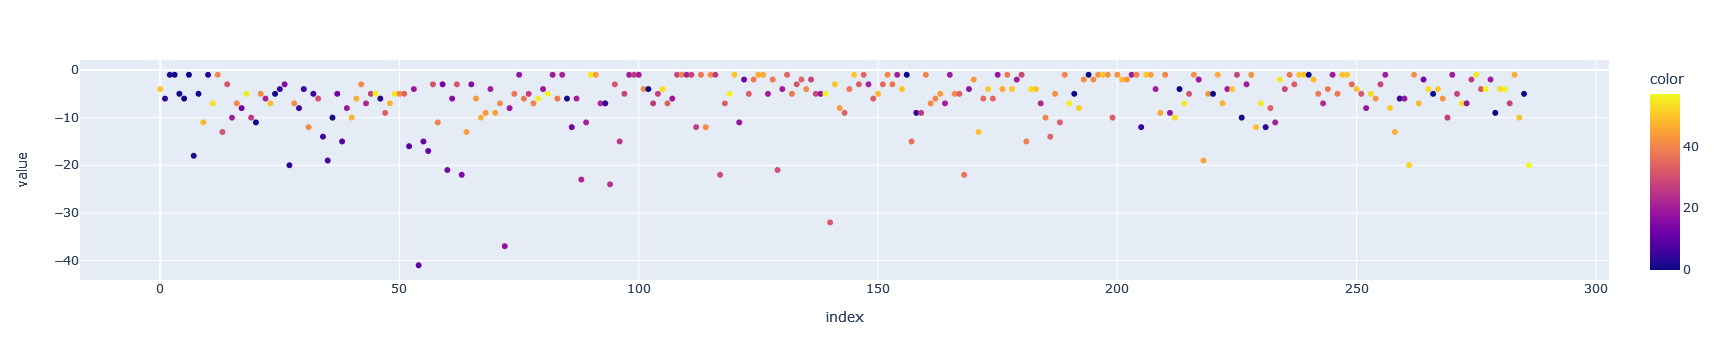

In [128]:
px.scatter(lev_similarity_1,
    color=affprop.labels_)

In [104]:
import numpy as np
from sklearn.cluster import AffinityPropagation
import distance
    
#words = "pies zjadl kota na sniadanie a kot zjadal psa".split(" ")
words= df.loc[df['PRZYCZYNA REKLAMACJI'].notnull()]['PRZYCZYNA REKLAMACJI'].unique()
words = np.asarray(words) #So that indexing with a list will work
#words=[''.join(filter(str.isalnum, i)) for i in words]
import re
words=[re.sub(r'[^a-zA-Z\d\s:]', '', i) for i in words]
words = np.asarray(words)
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])#words])

affprop = AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)

AffinityPropagation(affinity='precomputed')

In [106]:
df_affprop=pd.DataFrame(columns=['ile_dopasowalo','tekst1','tekst2'])
for cluster_id in np.unique(affprop.labels_):
    try:
        exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
        #cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
        cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
        cluster_str = " || ".join(cluster)
        df_affprop=df_affprop.append({'ile_dopasowalo':len(cluster)-1,
                                    'tekst1':exemplar,
                                     'tekst2':cluster_str},
                                    ignore_index=True)
        print(" - *%s:* %s" % (exemplar, cluster_str))
    except:
        print(exemplar, cluster_str)

 - *wymiana:* lamowka || niewymiarowa || odcien || wybrakowna || wymiana || wymiana  || wymiana na 56 || wymiar || wymiar flexy || wymiary || wysokosc || wystajaca nitka || zarysowany || zwrotwymiana
 - *wymiana i zwrot:* korekta bez zwrotu || priorytetowy zwrot || wymiana i zwrot || wymiana kolorystyczna || wymiana na 379753 || wymiana przelotek
 - *zwrot sprawdzic czy jest krzywa:* zwrot sprawdzic czy jest krzywa
 - *naprawa szwalnia:* do sprawdzenia tkanina || naprawa szwalnia || naprawa szwalniarolety || naprawa zwrot || naprawaszwalnia
 - *blad na stronie opisane jako z gumka:* blad na stronie opisane jako z gumka
 - *wadliwe kwiaty:* farbujace produkty || towar innego klienta || wadliwe firany || wadliwe kwiaty || wadliwe przelotki || wadliwy zegar || za dlugie do poprawy || zzolkniete kwiaty
 - *uszkodzony nadruk na zaslonach:* uszkodzony nadruk na zaslonach
 - *material wychodzi spod przelotek:* material wychodzi spod przelotek
 - *zaslony w dwoch kolorach:* zaslony w dwoch kol

In [107]:
df_affprop.to_excel(path_to_catalog+'affprop.xlsx')

In [74]:
exemplar = words[affprop.cluster_centers_indices_[1]]
cluster = np.unique(words[np.nonzero(affprop.labels_==1)])
cluster_str = ", ".join(cluster)
print(" - *%s:* %s" % (exemplar, cluster_str))

 - *zaslony:* calosc, narzuty, ozdoby, szyte zaslony, wazon, zas/katie, zaslona, zaslony, zaslony 


In [50]:
lev_similarity

array([[  0, -29,  -9, ..., -10, -13, -11],
       [-29,   0, -30, ..., -27, -26, -29],
       [ -9, -30,   0, ...,  -9, -12, -10],
       ...,
       [-10, -27,  -9, ...,   0, -12, -10],
       [-13, -26, -12, ..., -12,   0, -13],
       [-11, -29, -10, ..., -10, -13,   0]])

In [75]:
exemplar

'zaslony'

In [76]:
cluster

array(['calosc', 'narzuty', 'ozdoby', 'szyte zaslony', 'wazon',
       'zas/katie', 'zaslona', 'zaslony', 'zaslony '], dtype=object)

In [14]:
s= ['Series Name Part 1 This/ is the chapter name',
 'Series Name Part 2 Another name with the word chapter and extra oc at the start',
 "Series Name part 3 punctuation could be not matching so we can't always trust common substrings",
 'Another cool story Part I This is the chapter name',
 'another cool story part II another post title',
 'another cool story part III but the author forgot delimiters',
 "this is a one off story so it doesn't have any friends"]

In [22]:
s=df.loc[df['PRZYCZYNA REKLAMACJI'].notnull()]['PRZYCZYNA REKLAMACJI'].unique()

In [151]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') # only alphanumeric characters

lol_tokenized = []
for title in s:
    lol_tokenized.append(tokenizer.tokenize(title))
    
lol_tokenized=np.unique(lol_tokenized)

In [152]:
import numpy as np 
from gensim.models import Word2Vec

m = Word2Vec(lol_tokenized, vector_size=50, min_count=1,cbow_mean=1)  


def vectorizer(sent,m): 
    vec = [] 
    numw = 0 
    for w in sent: 
        try: 
            if numw == 0: 
                vec = m.wv[w].reshape((1, 50))
            else: 
                vec = np.add(vec, m.wv[w].reshape((1, -1))) 
            numw += 1 
        except Exception as e: 
            print(e) 
    return np.asarray(vec) / numw 

#vectorizer(lol_tokenized[0],m)
l = []
for i in lol_tokenized:
    try:
        l.append(vectorizer(i,m)[0])
    except: continue

X = np.array(l)

In [157]:
from sklearn.cluster import KMeans

df_kmeans=pd.DataFrame(columns=['label','tekst'])

clf = KMeans(n_clusters=50,init='k-means++',n_init=100,random_state=0)
labels = clf.fit_predict(X)
print(labels)
for index, sentence in enumerate(lol_tokenized):
    #print(str(labels[index]) + ":" + str(sentence))
    df_kmeans=df_kmeans.append({'label':labels[index],
                               'tekst':' '.join(sentence)},
                              ignore_index=True)

[47 16 47 13 32 32 47 47 47 47 47 47 13 32 47 44 49 47  7 47 26 31 15 47
 47 47 26 26 26 13 13 13 26 30 47  4  4  4 23 26 25  1 13 13 11 47 11  5
 31 11 11 19 11 15  8 25 22 24 22  9  9  9 13  2 31 42 47 31 31 14 14 15
 15 45 31 19 19 19 19 19 19 19 13 19 19 13 49 13  9 25 14 35 47 49  5 47
 47  5 47  5 25 25 25 25  0 47 10 10 10 10 10 18  7 47  6 47 45  7  5  5
 31 20  2  5 47 44  2 15 48 47 17  5 31 49 43  4 16 10 16 47 16 16 28 47
 26 19  5 40 19 45  8  3  3 16 12 24  3  3  3 39 39 39  8 39 39 14 14 14
 47 14 13 15 47 29 29 29 29 30  7 30 30  5 30 37 37 44 15 47 47 15 44  1
 14 34 12 12 12 12 12 12 49 49 36 26 21 25 47 41 41 41 41 13 41 41 33 13
 14 47 47 49 38 25 25 14 46  5 13  2  2  2  7  5 26 47  2  7 47 47  1  1
  1  1  1 13  1 47  7  1  1 47 47  1  1  1 47 11 47 47  8 44  8 49 49 47
 27 41 45 47 47 45 45 47 12 45  5]


In [158]:
df_kmeans=df_kmeans.merge(df_kmeans.groupby('label').agg(ile_wystapien=('tekst','count')).reset_index(),
                how='inner', on='label')

In [159]:
df_kmeans.to_excel(path_to_catalog+'kmeans.xlsx')

In [144]:
df_kmeans.loc[df_kmeans['label']==10]

,label,tekst
109,10,zaciagniecia
152,10,zaciagniecia


In [166]:
df.groupby('PRZYCZYNA REKLAMACJI').agg({'PRODUKT':'count'}).sort_values(by='PRODUKT', ascending=False)#/len(df)*100

,PRODUKT
PRZYCZYNA REKLAMACJI,
zwrot,31
blad na stronie,20
zly wymiar,13
inny kolor niz na stronie,11
naprawa/szwalnia,10
...,...
plamy/ material uszkodzony,1
plamy/zwrot,1
plamy?,1


In [169]:
df.loc[df['Unnamed: 0'].isna()]

,Unnamed: 0,Eurofirany/ ALLEGRO,IMIĘ I NAZWISKO,PRZYCZYNA REKLAMACJI,PRODUKT,ZWROT GOTÓWKI,ROZWIĄZANIE,KLIENT POINFORMOWANY,WYSŁANO,DATA I NR. KOREKTY,UWAGI,DATA PRZYJĘCIA,OS. PRZYJMUJĄCA REKLAMACJĘ,NUMER ZLECENIA,E-MAIL,Unnamed: 15,Unnamed: 16,produkt_2
381,NaN,NaN,Katarzyna Stępniewska,pomylka,towar,NaN,POMYŁKA,TAK,04.05.2022 MB,06.05 EWA,NADAĆ KURIERA PO ODBIÓR 05.05.2022 Katarzyna S...,2022-05-04 00:00:00,MB,43899406289.0,TEL: 732916276,NaN,NaN,TOWAR
